### Init

In [2]:
import numpy as np

In [3]:
with open("../inputs/input10.txt") as file: raw_data = file.read()
raw_data = [list(rd) for rd in raw_data.split("\n")]
data = np.asarray(raw_data, dtype=int)
data = np.pad(data, ((1, 1), (1, 1)), 'constant', constant_values = -1)

### Custom Function(s)

In [5]:
class Tile:
    def __init__(self, _x, _y, _val):
        self.x = _x
        self.y = _y
        self.val = _val
        self.neighbours = []
        self.origins = []
        self.ends = []

    def __repr__(self):
        return str(self.val)

    def FindValidNeighbours(self, grid):
        for i in range(-1, 2):
            for j in range(-1, 2):
                if abs(i+j) == 1:
                    try:
                        neighbour = grid[self.x+i, self.y+j]
                        if neighbour.val == (self.val + 1):
                            self.neighbours.append(neighbour)
                    except:
                        continue
                        

def DFS_FindRatings(graph, node):
    cnt = 0
    S, discovered = [], []
    S.append(node)
    while S:
        v = S.pop(-1)
        if v not in discovered:
            discovered.append(v)
            
            if v.val == 9:
                cnt += 1
            else:
                for neighbour in v.neighbours: 
                    S.append(neighbour)
                    
    return cnt

def DFS_FindPaths(graph, node):
    paths = []

    def DFS_Helper(node, path, discovered):
        path.append(node)
        discovered.append(node)

        if node.val == 9:
            paths.append(path.copy())
        else:
            for neighbour in node.neighbours:
                if neighbour not in discovered:
                    DFS_Helper(neighbour, path, discovered)
                    
        path.pop()
        discovered.pop()

    DFS_Helper(node, [], [])
    return paths

### Part 1

In [7]:
grid = np.empty((np.shape(data)), dtype=object)

for x,row in enumerate(data):
    for y,col in enumerate(row):
        grid[x,y] = Tile(x, y, int(data[x,y]))    
        
for x,row in enumerate(data):
    for y,col in enumerate(row):
        grid[x,y].FindValidNeighbours(grid)  

In [8]:
Xs, Ys = np.where(data == 0)
cnt = 0
for x,y in zip(Xs,Ys):
    cnt += DFS_FindRatings(grid, grid[x,y])
print(f"Part 1: {cnt}")

Part 1: 746


### Part 2

In [10]:
Xs, Ys = np.where(data == 0)
numPaths = 0
for x,y in zip(Xs,Ys):
    paths = DFS_FindPaths(grid, grid[x,y])
    numPaths += len(paths)
print(f"Part 2: {numPaths}")

Part 2: 1541


### Bonus

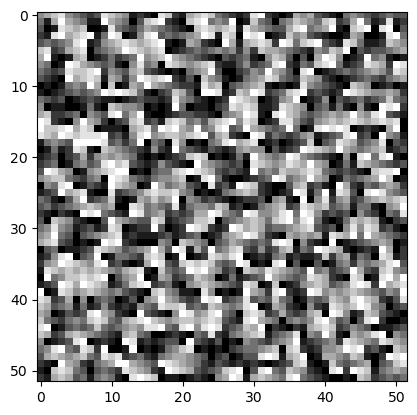

In [95]:
import matplotlib.pyplot as plt
plotgrid = np.zeros((grid.shape[0],grid.shape[1]))
for i,r in enumerate(grid):
    for j,c in enumerate(r):
        plotgrid[i,j] = grid[i,j].val
plt.imshow(plotgrid[1:-1,1:-1],cmap="gray")